In [177]:
import numpy as np
import pandas as pd
import scipy.special as special
import scipy.stats as stats
import matplotlib.pyplot as plt

Параметры

In [178]:
a = 3
sigma_squared = 16
sigma = np.sqrt(sigma_squared)
n = 90
q = 1.3

Генерация выборки

In [179]:
np.random.seed(42)  # Для воспроизводимости
sample = np.random.normal(loc=a, scale=sigma, size=n)

1.1. Интервальный ряд абсолютных частот

In [180]:
# Правило Стерджеса для расчета числа интервалов
num_bins = int(np.ceil(1 + 3.322 * np.log10(n)))  
freq, bins = np.histogram(sample, bins=num_bins)

In [181]:
# Сумма абсолютных частот
sum_absolute_freq = np.sum(freq)

print("Сумма абсолютных частот:", sum_absolute_freq)


Сумма абсолютных частот: 90


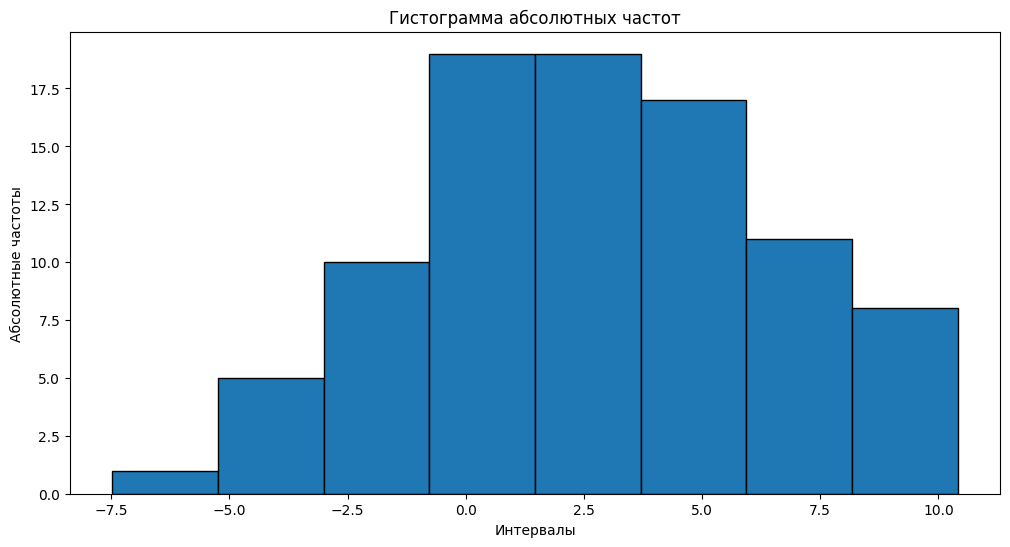

In [182]:
# Построение диаграммы абсолютных частот
plt.figure(figsize=(12, 6))
plt.hist(sample, bins=num_bins, edgecolor='black')
plt.title('Гистограмма абсолютных частот')
plt.xlabel('Интервалы')
plt.ylabel('Абсолютные частоты')
plt.show()

1.2. Интервальный ряд относительных частот

In [183]:
relative_freq = freq / n
# Сумма относительных частот
sum_relative_freq = np.sum(relative_freq)


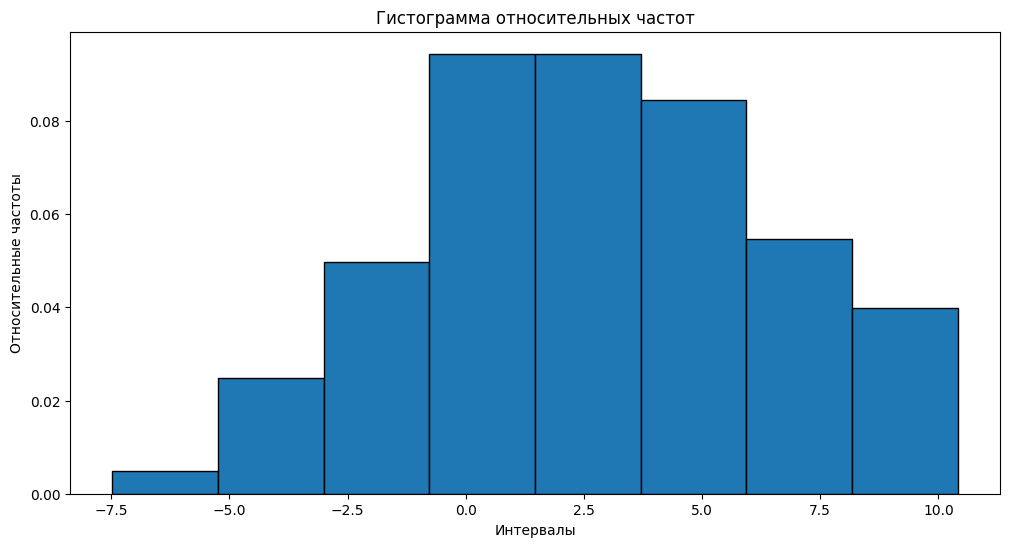

In [184]:
# Построение диаграммы относительных частот
plt.figure(figsize=(12, 6))
plt.hist(sample, bins=num_bins, edgecolor='black', density=True)
plt.title('Гистограмма относительных частот')
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты')
plt.show()

2. Визуализация данных

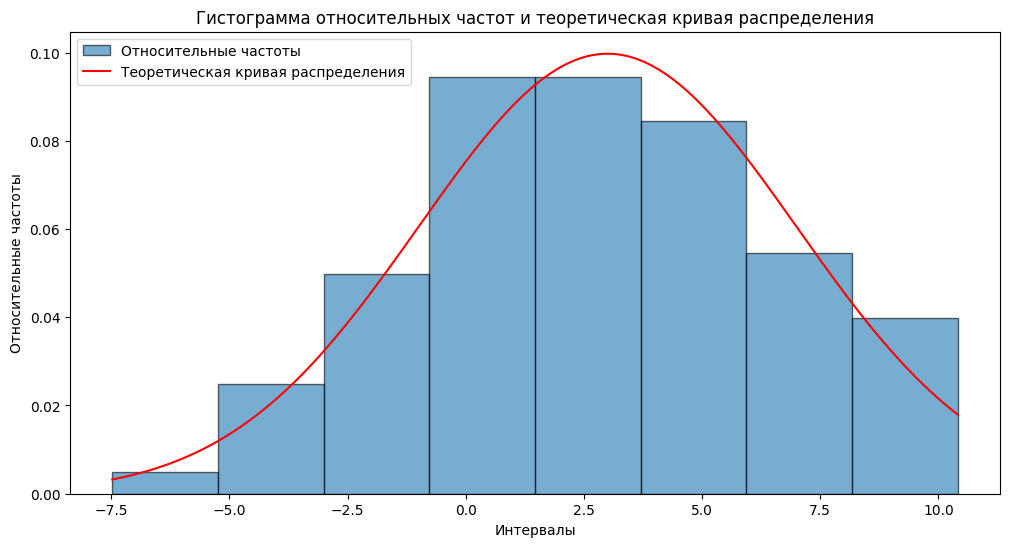

In [185]:
# 2.1. Гистограмма относительных частот и теоретическая кривая
# Теоретическая кривая распределения
x = np.linspace(min(sample), max(sample), 1000)
pdf = stats.norm.pdf(x, loc=a, scale=sigma)

# Гистограмма относительных частот и теоретическая кривая распределения
plt.figure(figsize=(12, 6))
plt.hist(sample, bins=num_bins, edgecolor='black', density=True, alpha=0.6, label='Относительные частоты')
plt.plot(x, pdf, 'r-', label='Теоретическая кривая распределения')
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты')
plt.legend()
plt.show()

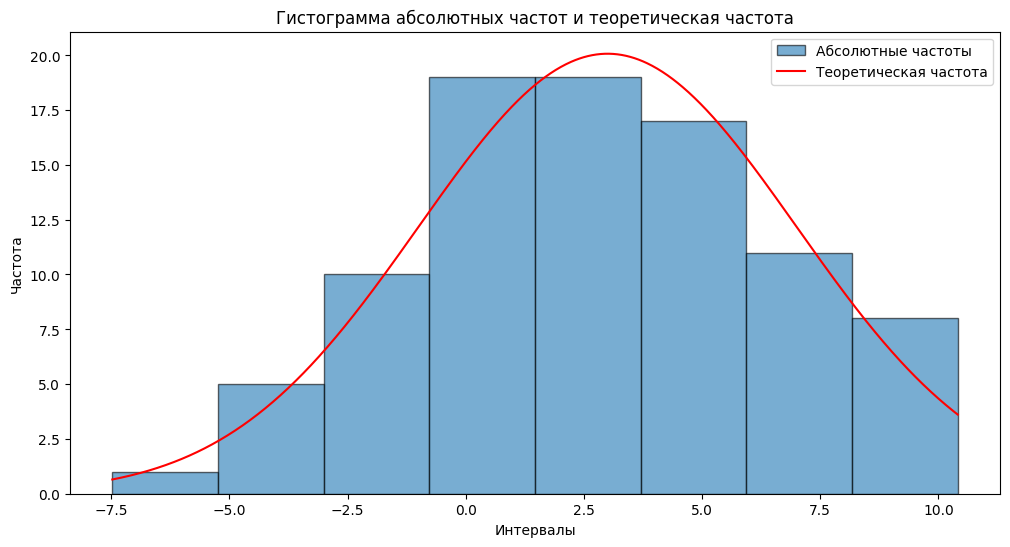

In [186]:
# 2.2. Гистограмма абсолютных частот и график теоретической частоты
plt.figure(figsize=(12, 6))
plt.hist(sample, bins=num_bins, edgecolor='black', alpha=0.6, label='Абсолютные частоты')
plt.plot(x, pdf * n * (bins[1] - bins[0]), 'r-', label='Теоретическая частота')
plt.title('Гистограмма абсолютных частот и теоретическая частота')
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.legend()
plt.show()


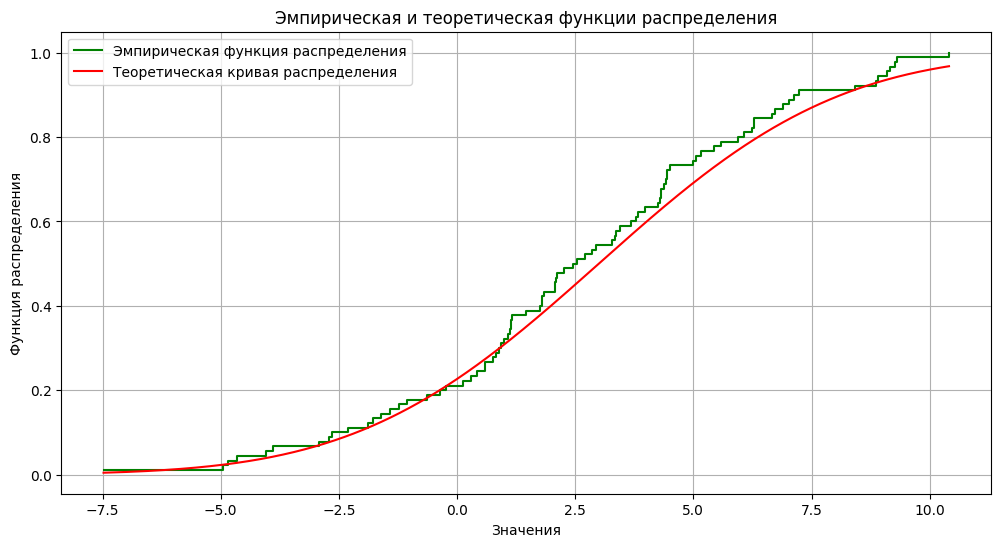

In [187]:
# Эмпирическая функция распределения
sorted_sample = np.sort(sample)
cumulative_counts = np.arange(1, n + 1) / n

# Построение графика эмпирической функции распределения
plt.figure(figsize=(12, 6))
plt.step(sorted_sample, cumulative_counts, label='Эмпирическая функция распределения', color='g', where='post')

# Теоретическая кривая распределения
x = np.linspace(min(sample), max(sample), 1000)
cdf = stats.norm.cdf(x, loc=a, scale=sigma)  # теоретическая функция распределения 
plt.plot(x, cdf, 'r-', label='Теоретическая кривая распределения')

# Настройка графика
plt.title('Эмпирическая и теоретическая функции распределения')
plt.xlabel('Значения')
plt.ylabel('Функция распределения')
plt.legend()
plt.grid()
plt.show()

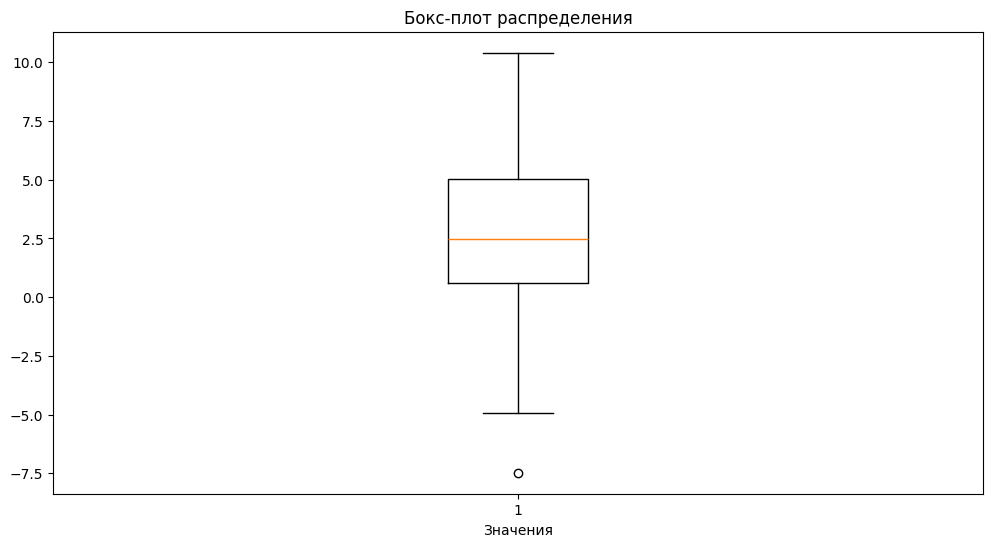

In [188]:
plt.figure(figsize=(12, 6))
plt.boxplot(sample)
plt.title('Бокс-плот распределения')
plt.xlabel('Значения')
plt.show()

In [189]:
# Статистическая интерпретация
outliers = np.sum((sample < np.percentile(sample, 25) - 1.5 * stats.iqr(sample)) |
                  (sample > np.percentile(sample, 75) + 1.5 * stats.iqr(sample)))
print(f'Теоретически ожидаемое число выбросов: {outliers}')

Теоретически ожидаемое число выбросов: 1


3. Вероятности

In [190]:
# 3.1. Вероятность P(|X-MX| < qσ)
def laplace_function(x):
    return (1.0 + special.erf(x / np.sqrt(2.0))) / 2.0

prob_manual = laplace_function(q) - laplace_function(-q)
print(f'Вероятность P(|X - MX| < {q}сигма) вручную: {prob_manual}')

# Вероятность P(|X - MX| < qσ) с использованием встроенных функций
prob_python = stats.norm.cdf(q) - stats.norm.cdf(-q)
print(f'Вероятность P(|X - MX| < {q}сигма) с использованием встроенных функций: {prob_python}')


Вероятность P(|X - MX| < 1.3сигма) вручную: 0.8063990308287792
Вероятность P(|X - MX| < 1.3сигма) с использованием встроенных функций: 0.8063990308287794


In [191]:
# 3.2. Оценка вероятности по выборке
mx = np.mean(sample)
sigma = np.std(sample)
prob_sample = np.sum(np.abs(sample - mx) < q * sigma) / n
print(f'Оценка вероятности по выборке: {prob_sample}')

Оценка вероятности по выборке: 0.8


In [192]:
# 3.3. Увеличение объема выборки
n_large = 50 * n
sample_large = np.random.normal(loc=a, scale=sigma, size=n_large)

prob_sample_large = np.sum(np.abs(sample_large - a) < q * sigma) / n_large
print(f'Оценка вероятности по выборке при увеличенном объеме: {prob_sample_large}')

Оценка вероятности по выборке при увеличенном объеме: 0.8097777777777778


4. Точечные оценки параметров

In [193]:
mean_estimate = np.mean(sample)
median_estimate = np.median(sample)
variance_estimate = np.var(sample, ddof=1)
std_dev_estimate = np.std(sample, ddof=1)
skewness_estimate = stats.skew(sample)
kurtosis_estimate = stats.kurtosis(sample)

print(f'Среднее: {mean_estimate}')
print(f'Медиана: {median_estimate}')
print(f'Дисперсия: {variance_estimate}')
print(f'Стандартное отклонение: {std_dev_estimate}')
print(f'Коэффициент асимметрии: {skewness_estimate}')
print(f'Эксцесс: {kurtosis_estimate}')

Среднее: 2.604767208441658
Медиана: 2.4921748328811497
Дисперсия: 13.986066811862447
Стандартное отклонение: 3.7397950227067858
Коэффициент асимметрии: -0.1755540542596753
Эксцесс: -0.24946367284993354


In [194]:
# 4.2. Применение встроенных функций
describe = stats.describe(sample)
print(f'Среднее (встроенная функция): {describe.mean}')
print(f'Дисперсия (встроенная функция): {describe.variance}')
print(f'Стандартное отклонение (встроенная функция): {np.sqrt(describe.variance)}')
print(f'Коэффициент асимметрии (встроенная функция): {describe.skewness}')
print(f'Эксцесс (встроенная функция): {describe.kurtosis}')


Среднее (встроенная функция): 2.604767208441658
Дисперсия (встроенная функция): 13.986066811862447
Стандартное отклонение (встроенная функция): 3.7397950227067858
Коэффициент асимметрии (встроенная функция): -0.1755540542596753
Эксцесс (встроенная функция): -0.24946367284993354


Для новой выборки

In [195]:
# Увеличение объема выборки в 50 раз и повторение вычислений
describe_large = stats.describe(sample_large)
print(f'Среднее (увеличенная выборка): {describe_large.mean}')
print(f'Дисперсия (увеличенная выборка): {describe_large.variance}')
print(f'Стандартное отклонение (увеличенная выборка): {np.sqrt(describe_large.variance)}')
print(f'Коэффициент асимметрии (увеличенная выборка): {describe_large.skewness}')
print(f'Эксцесс (увеличенная выборка): {describe_large.kurtosis}')

Среднее (увеличенная выборка): 3.0348980536278307
Дисперсия (увеличенная выборка): 13.71465197830287
Стандартное отклонение (увеличенная выборка): 3.7033298500542546
Коэффициент асимметрии (увеличенная выборка): 0.007815714193918187
Эксцесс (увеличенная выборка): 0.0021655365078943056


2 часть

In [196]:
# Параметры
k1 = 5
k2 = 10
n = 90  # объем выборки

In [197]:
# Генерация выборки из F-распределения
sample_f = np.random.f(dfnum=k1, dfden=k2, size=n)

2. Построить гистограмму относительных частот и теоретическую кривую распределения

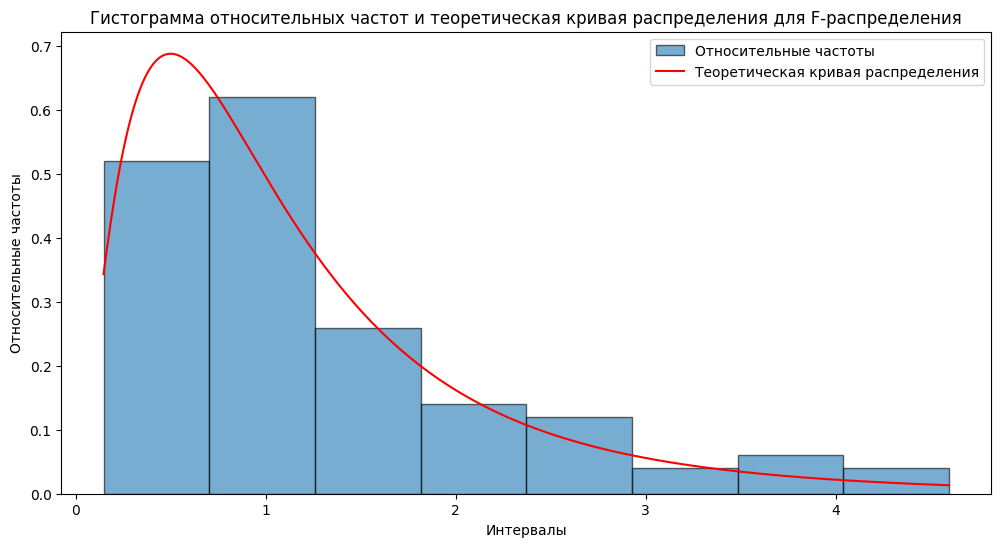

In [198]:
x = np.linspace(min(sample_f), max(sample_f), 1000)
pdf_f = stats.f.pdf(x, dfn=k1, dfd=k2)

plt.figure(figsize=(12, 6))
plt.hist(sample_f, bins=num_bins, edgecolor='black', density=True, alpha=0.6, label='Относительные частоты')
plt.plot(x, pdf_f, 'r-', label='Теоретическая кривая распределения')
plt.title('Гистограмма относительных частот и теоретическая кривая распределения для F-распределения')
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты')
plt.legend()
plt.show()


3. Построить бокс-плот распределения Y и дать статистическую интерпретацию

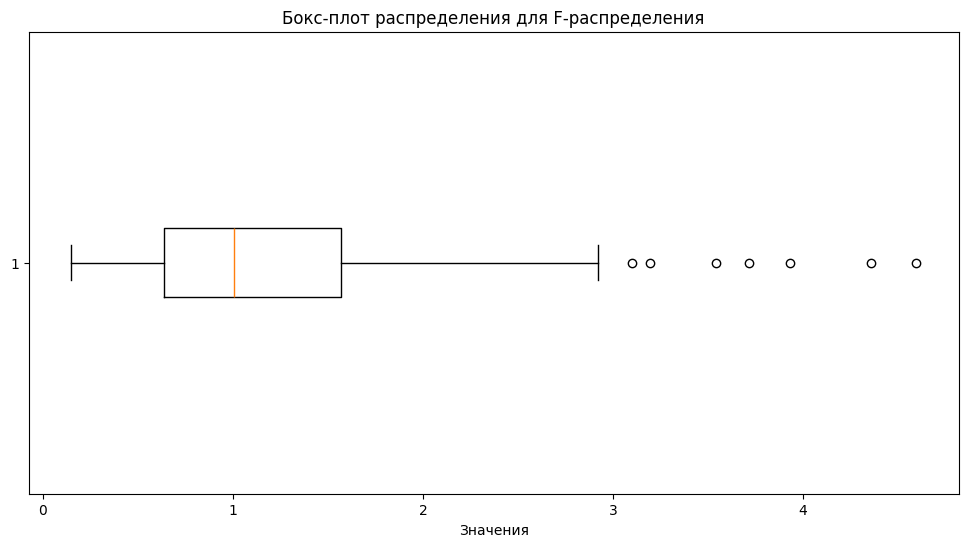

In [199]:
# Построение бокс-плота
plt.figure(figsize=(12, 6))
plt.boxplot(sample_f, vert=False)
plt.title('Бокс-плот распределения для F-распределения')
plt.xlabel('Значения')
plt.show()

In [200]:
# Статистическая интерпретация бокс-плота
outliers_f = np.sum((sample_f < np.percentile(sample_f, 25) - 1.5 * stats.iqr(sample_f)) |
                    (sample_f > np.percentile(sample_f, 75) + 1.5 * stats.iqr(sample_f)))
print(f'Теоретически ожидаемое число выбросов для F-распределения: {outliers_f}')

Теоретически ожидаемое число выбросов для F-распределения: 7
